In [ ]:
# importing relevant files
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV

# ***Loading Data***

In [ ]:
# Loading the csv data and saving it to a DataFrame 'df'
data = pd.read_csv("EduCompany.csv")

# Reading the top 5 rows of data in DataFrame df
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# ***1. Problem Statement and Exploratory Data Analysis***

**Problen Statement:**
* As a Data Scientist at EduCompany, utilize the dataset to construct a predictive model capable of estimating an applicant's likelihood of admission to Ivy League colleges based on the available features.
* Analyze given dataset to help EduCompany in understanding the crucial
factors impacting graduate admissions and their interrelationships and derive valuable insights from it.

**Define Problem Statement and perform Exploratory Data Analysis**

* Definition of problem
* Observations on dataset
* Univariate Analysis
* Bivariate Analysis
* Insights based on EDA

## ***Basic EDA on Dataset***

In [ ]:
# Creating a function to inspect various aspects of the raw data

from tabulate import tabulate

def data_inspection(df):
  '''
  Description: This function returns basic details about the dataset to perform data inspection:
               1) Rows and columns of the DataFrame
               2) General information about the DataFrame
               3) Number of NULL or missing values in the DataFrame in each column.
  '''
  print("(Rows,Columns) of DataFrame: ",df.shape)  # shape of the data
  print("********************************************************************************")
  print("General Information: \n",tabulate(df.info()))   # general info about the data
  print("********************************************************************************")
  print("# null values in Features: \n\n",df.isnull().sum())     # Number of null values on each column of the data
  print("********************************************************************************")
  #print("Data Statistics (Numerical data): \n",tabulate(df.describe()))   # returns statistical summary of numerical data
  #print("********************************************************************************")
  #print("Data Statistics (Categorical data): \n",tabulate(df.describe(include = object)))   # returns statistical summary of categorical data
  #print("********************************************************************************")

In [ ]:
# Function to identify unique value and counts for discrete or categorical data and min max value for continous numerical data

def unique_data(df):
    '''
    Description: unique_data(df) prints unique values and counts present in columns.
                 Features are divided into:
                 Discrete features - Numerical features with less than 10 unique values
                 Continuous features - Numerical features with more than 10 unique values
                 Categorical features - With data type as object

    Input:       The DataFrame for which unique values are required to be printed

    Output:      - Prints value_counts() for Discrete Numerical and Categorcial Features and Min, Max values for Continuous Numerical Features
                 - Returns the list of categorical_features, discrete_features, continuous_features in that order
    '''
    discrete_features = []
    continuous_features = []
    categorical_features = []

    # Iterate through each column in the DataFrame
    for feature in df.columns:
      if df[feature].dtype == object:
        categorical_features.append(feature)
      elif df[feature].nunique() <= 10:
        discrete_features.append(feature)
      else:
        continuous_features.append(feature)

    # Unique values for Discrete Numerical features
    for ft in discrete_features:
      print("Unique values for ", df[ft].value_counts())            # Print the unique values and their counts
      print("********************************************************")  # Print a separator

    # Unique values for Continuous Numerical features
    for ft in continuous_features:
      print(f" (Min,Max) for {ft}: {df[ft].min(), df[ft].max()}")           # Print the unique values and their counts
      print("********************************************************")     # Print a separator

    # Unique values for Categorical non Numerical features
    for ft in categorical_features:
      print("Unique values for ", df[ft].value_counts())            # Print the unique values and their counts
      print("********************************************************")  # Print a separator

    return categorical_features, discrete_features, continuous_features

In [ ]:
# Returns statistical summary of numerical data
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
# Returns statistical summary of categorical data
# data.describe(include = object)
# There are no categorical variables in the dataset

In [ ]:
# inspecting the dataset
data_inspection(data)

(Rows,Columns) of DataFrame:  (500, 9)
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
General Information: 
 
********************************************************************************
# null values in Features: 

 Serial No.           0
GRE Score            0
TOEFL Score     

In [ ]:
# Unpacking different column types and printing unique values for each column
f_cat, f_num_dis, f_num_con = unique_data(data)

Unique values for  University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64
********************************************************
Unique values for  SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64
********************************************************
Unique values for  LOR 
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64
********************************************************
Unique values for  Research
1    280
0    220
Name: count, dtype: int64
********************************************************
 (Min,Max) for Serial No.: (1, 500)
********************************************************
 (Min,Max) for GRE Score: (290, 340)
********************************************************
 (Min,Max) for TOEFL Score: (92, 120)
********************************************************
 (Min,Max) for CGPA: (6.8, 9.92

**Comments:**
* GRE, TOEFL score, University Rating, SOP, LOR, CGPA, Research, Change of Admit - All factors in the dataset are higher the better
* Dataset has 500 samples and 9 features
* All Features are numerical, there are no categorical features
* There are no missing, null values in the dataset
* (Min,Max) for Serial No.: (1, 500)
* (Min,Max) for GRE Score: (290, 340)
* (Min,Max) for TOEFL Score: (92, 120)
* (Min,Max) for CGPA: (6.8, 9.92)
* (Min,Max) for Chance of Admit : (0.34, 0.97)
* University ranking is from 1 to 5 with most universities ranked 3.
* SOP ranked from 1.0 to 5.0
* LOR ranked between 1.0 to 5.0
* 280 applicants with Research and 220 applicants without research are present

**Action:**
* Remove Serial No. as it is a unique value not required for analysis
* Check for duplicate entries and remove if any.
* There are no missing values, so no action required here.

## ***Data Cleaning***

### ***Dropping columns irrelevant for analysis***

In [ ]:
# Since "Serial No." column has no information that would be helpful in providing insights we will drop this column.
# Additionally if we do predictive modelling in presence of this column, it would bring in unnecessary ordinality as serial no 1 will be considered less than serial no 50 by the model,
# which will in turn impact model's performance
# Therefore we drop "Serial No." column

data.drop(labels="Serial No.", axis=1, inplace=True)

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### ***Correcting column names***

In [ ]:
# removing blank spaces at the end of column names
data.rename(columns={"LOR ":"LOR", "Chance of Admit ":"Chance of Admit"},inplace=True)

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

## ***Exploratory Data Analysis***

### ***Univariate Analysis***

In [ ]:
# Plotting Histogram for Continuous Variables
import numpy as np
import matplotlib.pyplot as plt

def histplot(df):
  for feature in df.columns:
    # Skipping non-numeric features for histogram plotting
    if df[feature].dtype == 'object':
        continue

    # Calculate mean, median, and mode
    mean = df[feature].mean()  # Fill in the blank to calculate mean
    median = df[feature].median()  # Fill in the blank to calculate median
    mode = df[feature].mode().get(0, np.nan)  # Fill in the blank to calculate mode

    # Create the histogram
    plt.figure(figsize=(8, 5))
    df[feature].hist(bins=20, alpha=0.7)

    # Add lines for mean, median, and mode
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)  # Fill in the blank to plot mean
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2)  # Fill in the blank to plot median
    plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2)  # Fill in the blank to plot mode

    # Add annotations for mean, median, and mode
    plt.text(mean, plt.ylim()[1] * 0.95, f'Mean: {mean:.2f}', color = 'red')  # Fill in the blank to annotate mean
    plt.text(median, plt.ylim()[1] * 0.90, f'Median: {median:.2f}', color = 'green')  # Fill in the blank to annotate median
    plt.text(mode, plt.ylim()[1] * 0.85, f'Mode: {mode:.2f}', color = 'blue')  # Fill in the blank to annotate mode

    # Add title and labels
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

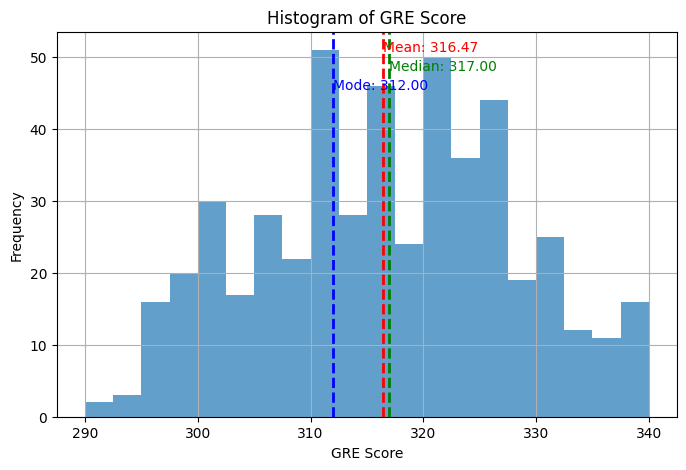

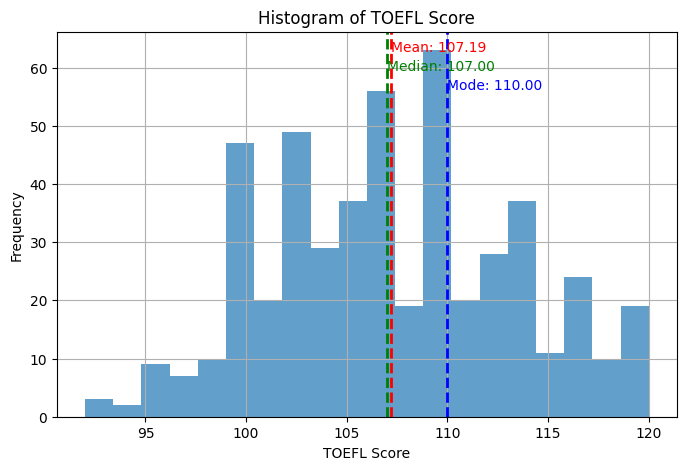

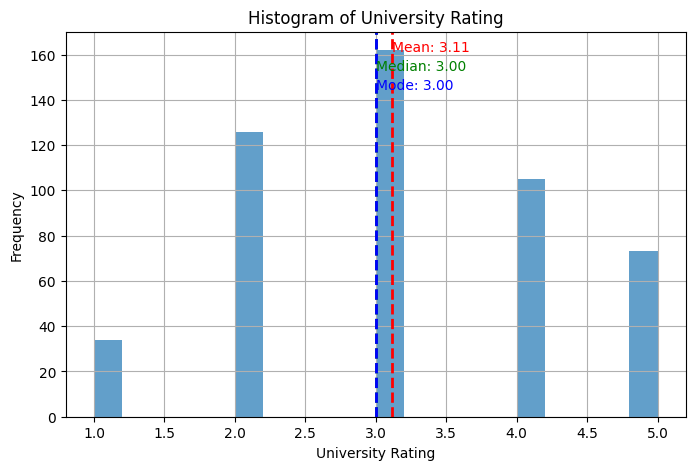

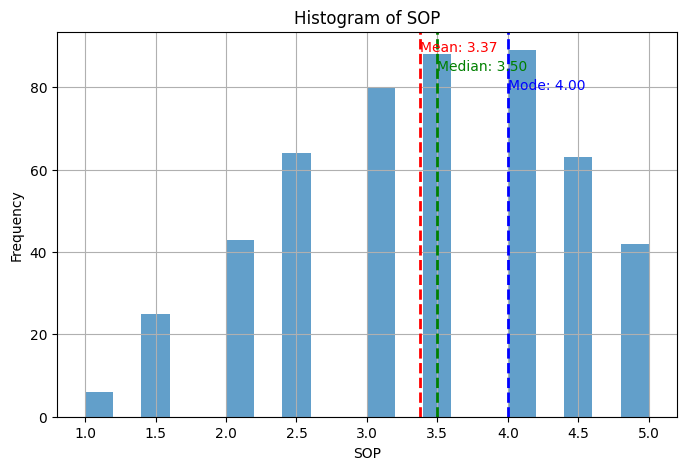

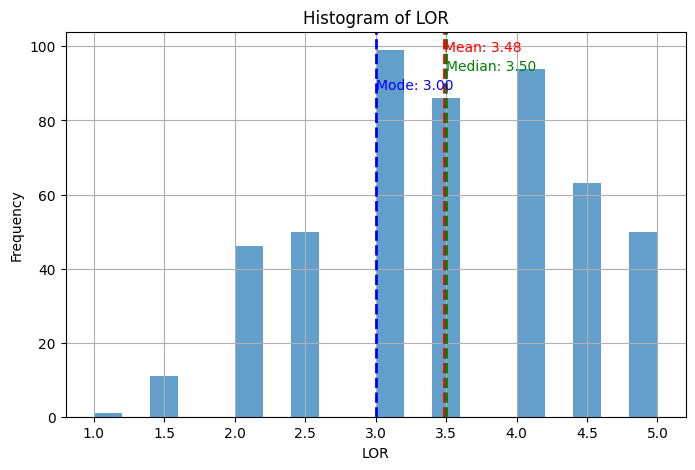

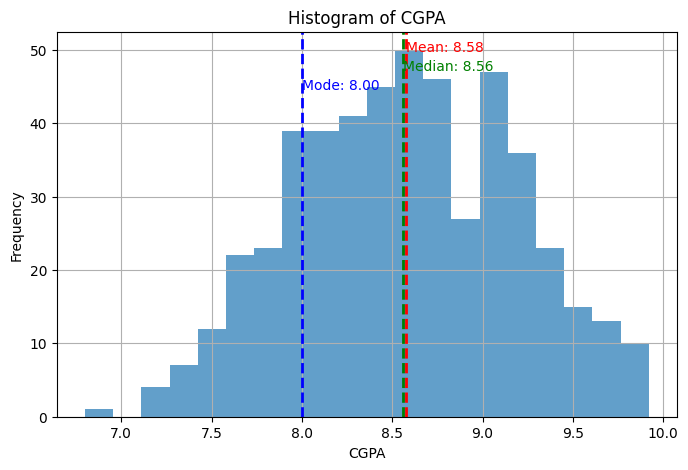

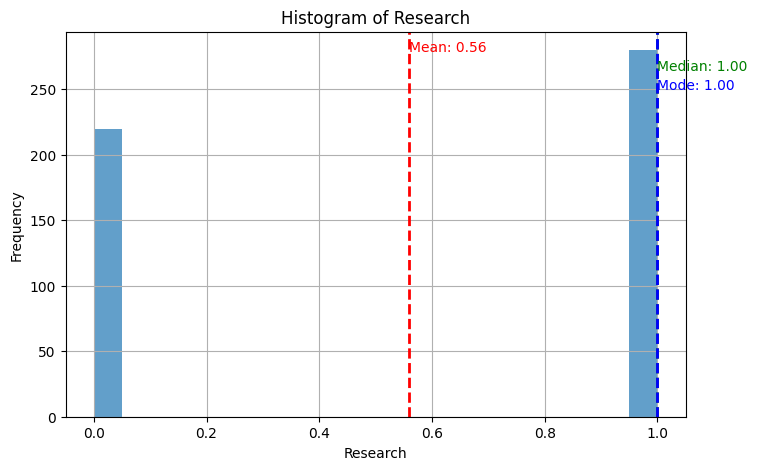

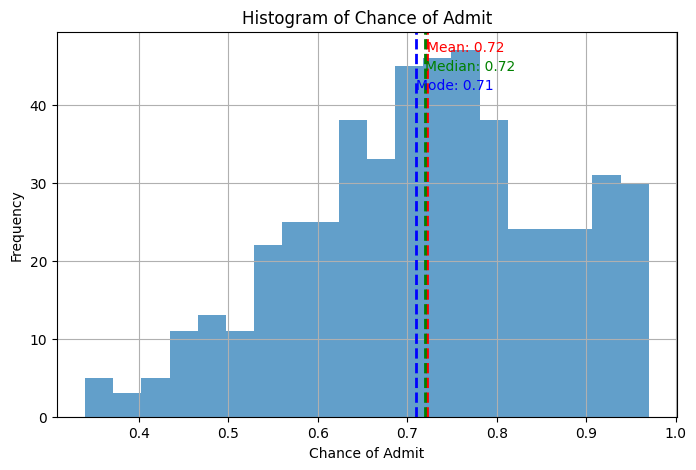

In [ ]:
histplot(data)

Range of GRE Scores: [290, 340]



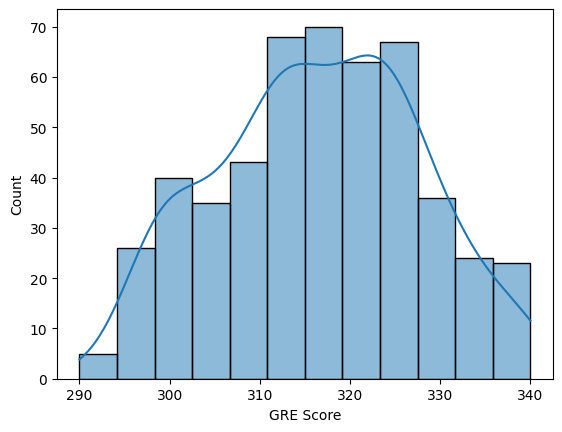

In [ ]:
# GRE Score
# Continuous feature
min=data["GRE Score"].min()
max=data["GRE Score"].max()
print(f"Range of GRE Scores: [{min}, {max}]\n")
sns.histplot(data["GRE Score"],kde=True)
plt.show()
# Majority of applicants have GRE scores b/w 310 to 325

Range of TOEFL Scores: [92, 120]



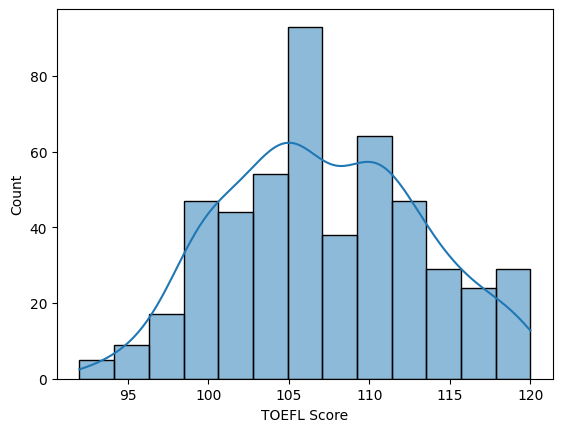

In [ ]:
# TOEFL Score
# Continuous feature
min=data["TOEFL Score"].min()
max=data["TOEFL Score"].max()
print(f"Range of TOEFL Scores: [{min}, {max}]\n")
sns.histplot(data["TOEFL Score"],kde=True)
plt.show()
# Majority of applicants have TOEFL scores b/w 100 to 110

Range of University Rating: [1, 5]



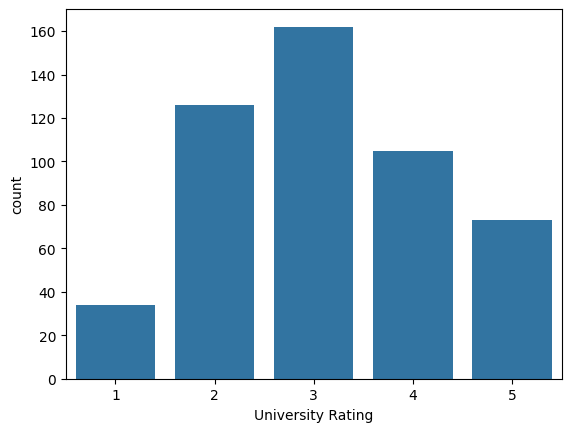

In [ ]:
# University Rating
# Discrete feature, kept numerical because of ordinality importance
min=data["University Rating"].min()
max=data["University Rating"].max()
print(f"Range of University Rating: [{min}, {max}]\n")
sns.countplot(data=data,x="University Rating")
plt.show()
# Most of the applicants are from Universities with a rating of 3

Range of SOP: [1.0, 5.0]



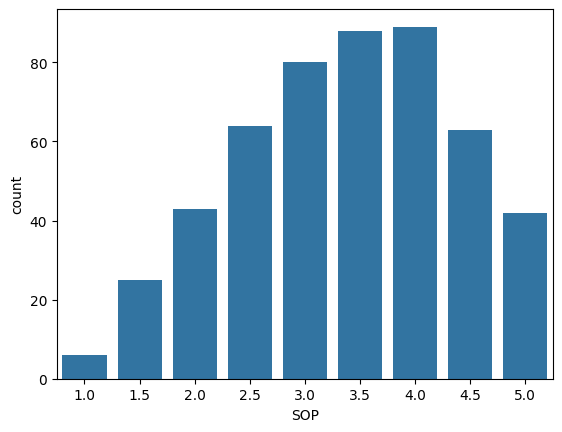

In [ ]:
# SOP
# Discrete feature, kept numerical because of ordinality importance
min=data["SOP"].min()
max=data["SOP"].max()
print(f"Range of SOP: [{min}, {max}]\n")
sns.countplot(data=data,x="SOP")
plt.show()
# Most of the applicants have SOP rated b/w 3-4

Range of LOR: [1.0, 5.0]



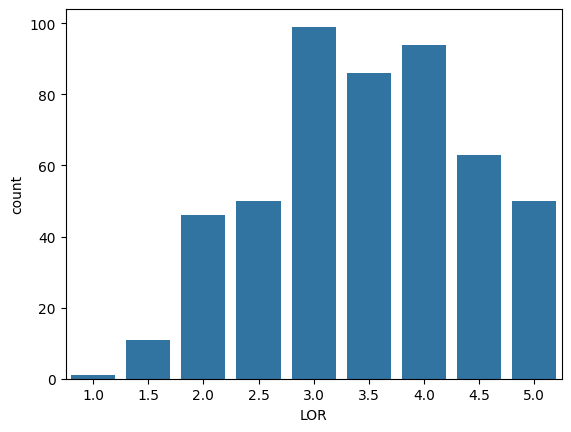

In [ ]:
# LOR
# Discrete feature, kept numerical because of ordinality importance
min=data["LOR"].min()
max=data["LOR"].max()
print(f"Range of LOR: [{min}, {max}]\n")
sns.countplot(data=data,x="LOR")
plt.show()
# Most of the applicants have LOR rated b/w 3-4

Range of CGPA: [6.8, 9.92]



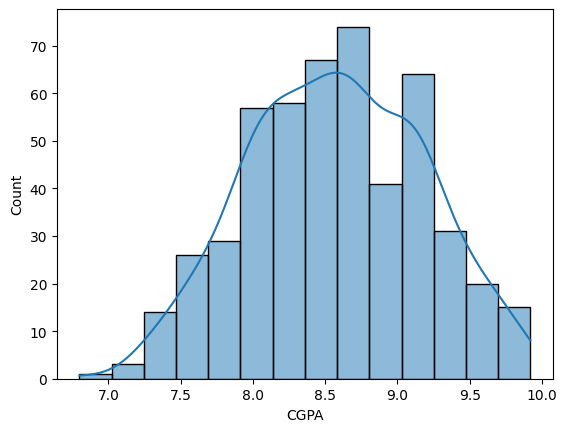

In [ ]:
# CGPA
# Continuous feature
min=data["CGPA"].min()
max=data["CGPA"].max()
print(f"Range of CGPA: [{min}, {max}]\n")
sns.histplot(data["CGPA"],kde=True)
plt.show()
# Majority of applicants have CGPA  b/w 8.25 to 8.75

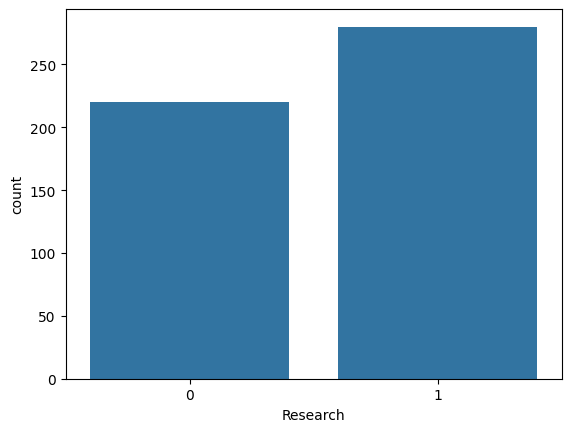

In [ ]:
# Research
# Categorical Feature
sns.countplot(data=data,x="Research")
plt.show()
# We see more applicants with research background

Range of Chance of Admit: [0.34, 0.97]



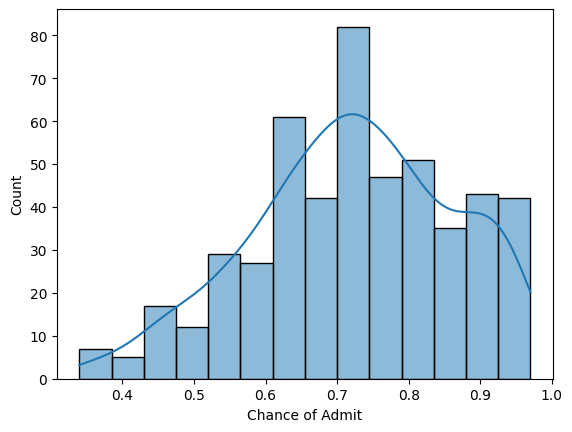

In [ ]:
# TOEFL Score
# Continuous feature
# Target Variable for Predictive Modeling
min=data["Chance of Admit"].min()
max=data["Chance of Admit"].max()
print(f"Range of Chance of Admit: [{min}, {max}]\n")
sns.histplot(data["Chance of Admit"],kde=True)
plt.show()
# Majority of applicants have Chance of Admit b/w 0.65 to 0.75

**Comments:**

Univariate Analysis

Continuous features
* GRE Score: mean and median are around 316, 317 hence data is almost normal.
* TOEFL Score: mean and median are around 107 hence data is almost normal.
* CGPA: mean and median are around 8.57 hence data is almost normal.
* Chance of Admit: mean and median are 0.72 and mode is 0.71 hence data is normal but appears to be left skewed.

### ***Bivariate Analysis***

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

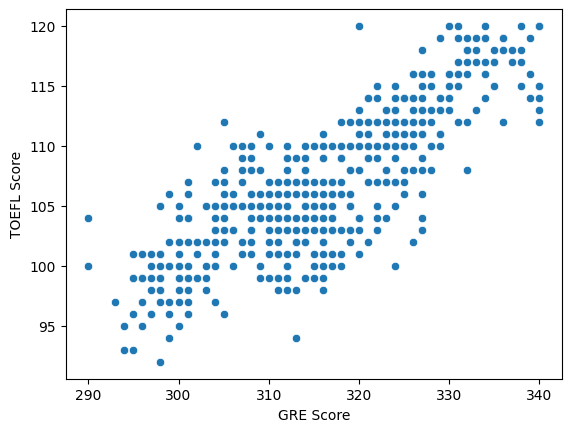

In [ ]:
# Scatter plot for GRE & TOEFL scores
sns.scatterplot(data=data,x="GRE Score",y="TOEFL Score")

<Axes: ylabel='GRE Score'>

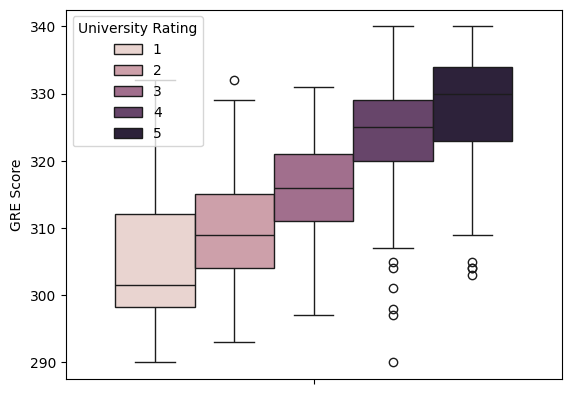

In [ ]:
# Box plot for GRE score and university rating
sns.boxplot(data=data,y="GRE Score",hue="University Rating")

<Axes: ylabel='GRE Score'>

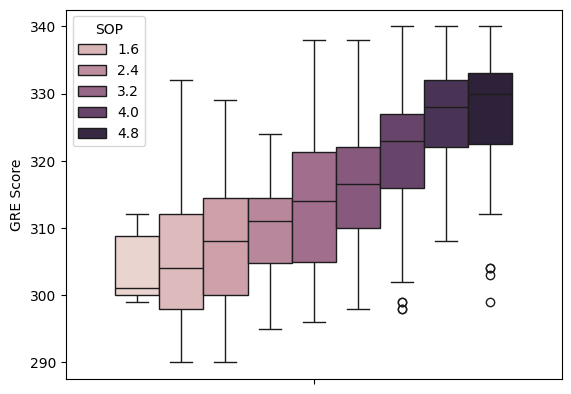

In [ ]:
# Boxplot of GRE score and SOP rating
sns.boxplot(data=data,y="GRE Score",hue="SOP")

<Axes: ylabel='GRE Score'>

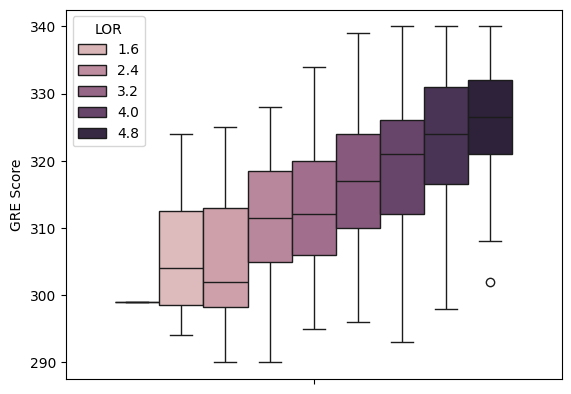

In [ ]:
# Box plot of GRE score and LOR
sns.boxplot(data=data,y="GRE Score",hue="LOR")

<Axes: xlabel='CGPA', ylabel='GRE Score'>

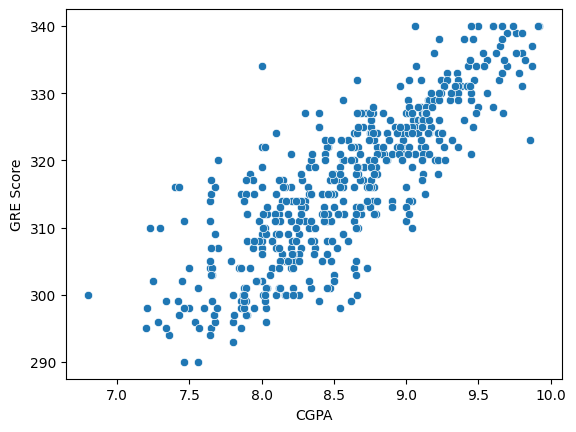

In [ ]:
# Scatter plot for GRE score and CGPA
sns.scatterplot(data=data,y="GRE Score",x="CGPA")

<Axes: ylabel='GRE Score'>

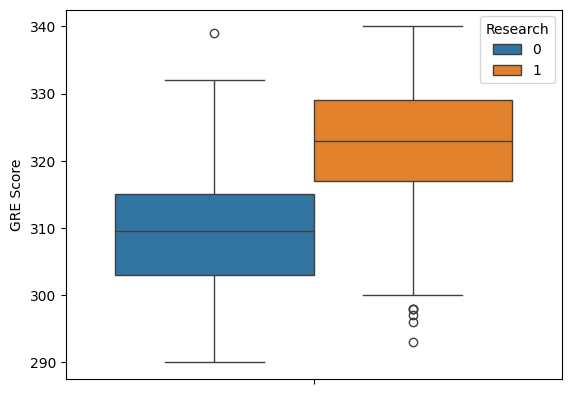

In [ ]:
# Box plot of GRE Score and Research
sns.boxplot(data=data,y="GRE Score",hue="Research")

<Axes: ylabel='Chance of Admit'>

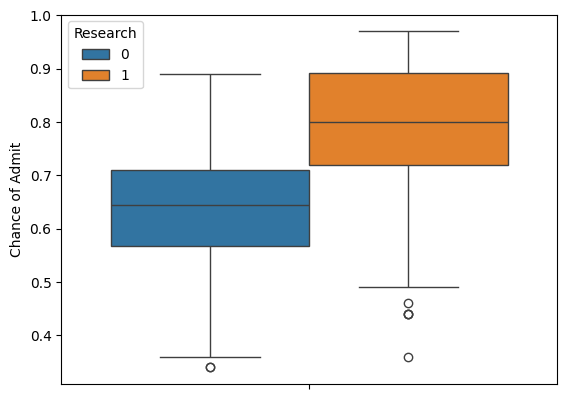

In [ ]:
# Box Plot of Research and chance of admit
sns.boxplot(data=data,y="Chance of Admit",hue="Research")

<Axes: xlabel='Chance of Admit', ylabel='GRE Score'>

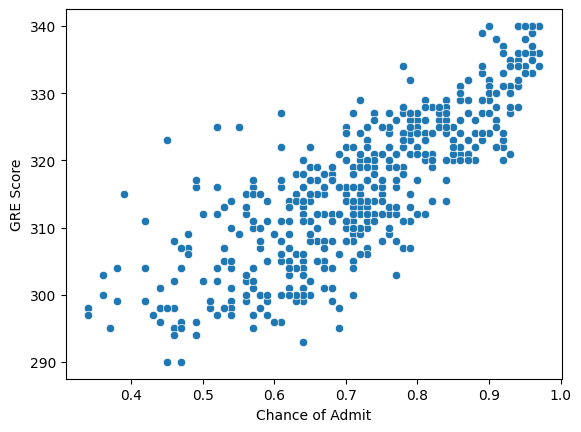

In [ ]:
# Plotting GRE Score and CHance of Admit
sns.scatterplot(data=data,y="GRE Score",x="Chance of Admit")

### ***Multivariate Analysis***

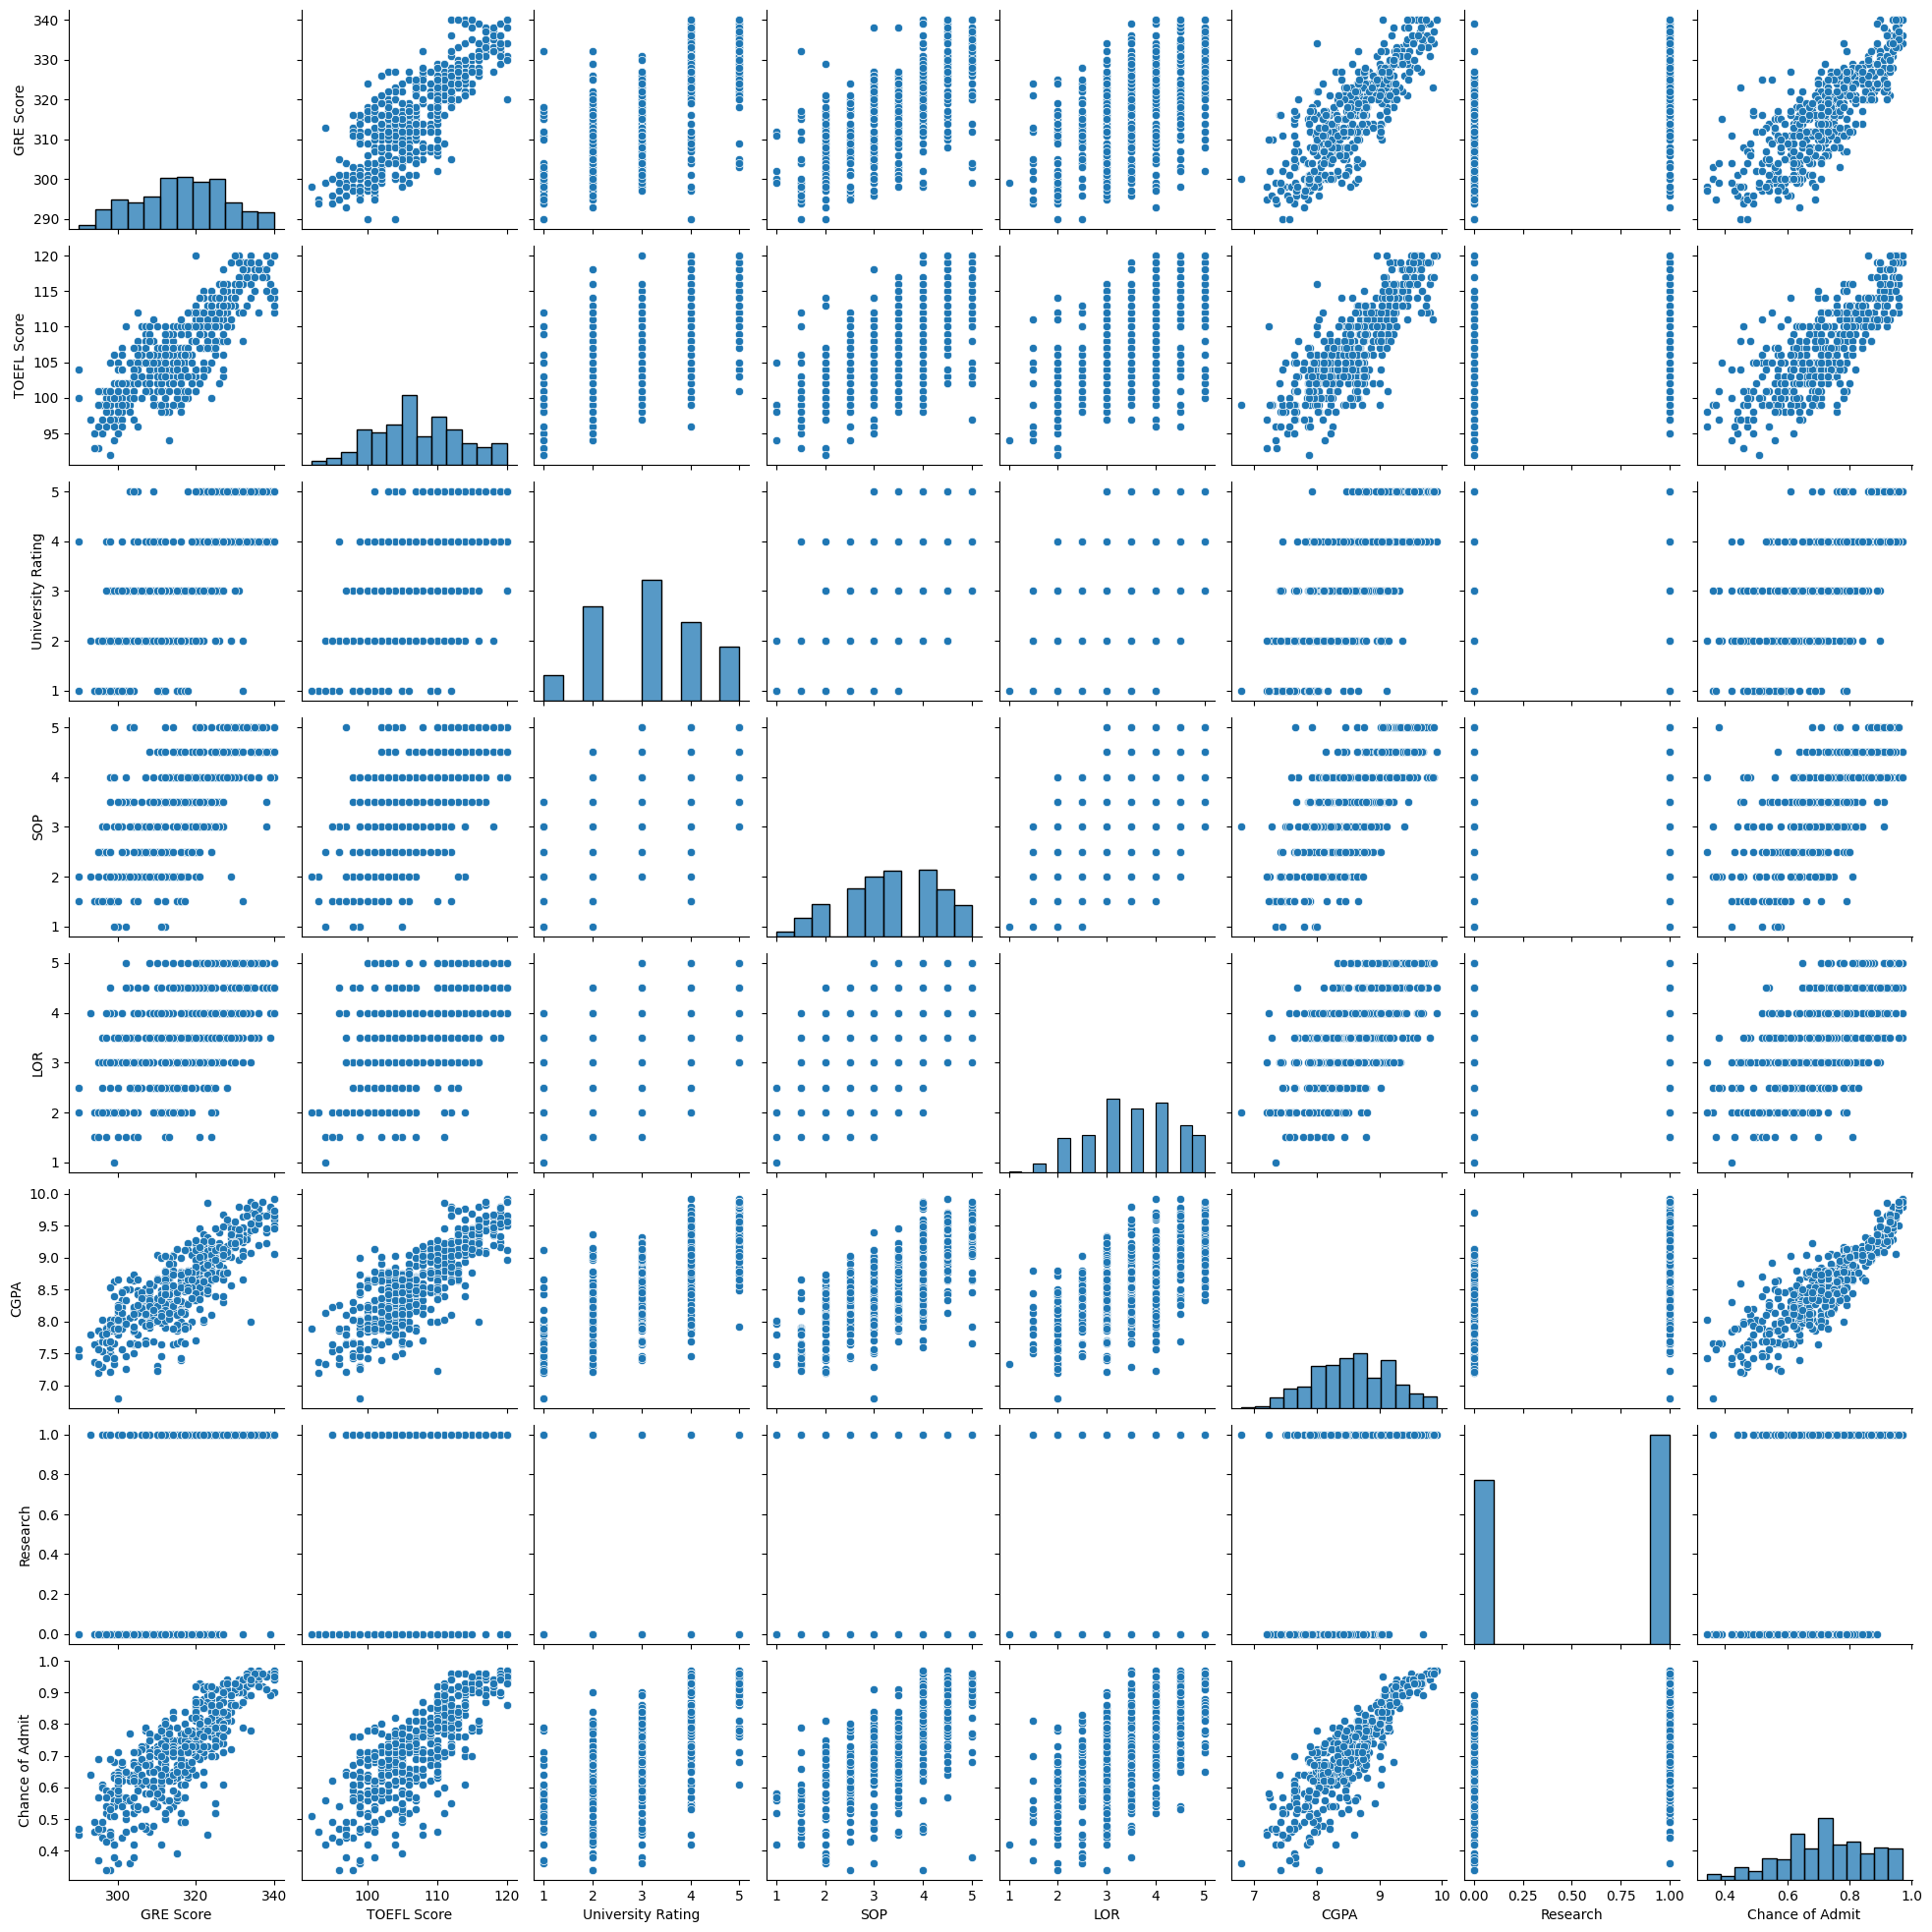

In [ ]:
# Pairplot of data
sns.pairplot(data=data)

In [ ]:
# Calculating pearson's correlation b/w all the features except categorical feature research
# We are using pearson correlation since we need to chech linear correlation b/w the features

# Features to include in the correlation matrix
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
# Compute the correlation matrix for the selected features
correlation_matrix = data[features].corr(method="pearson")

correlation_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


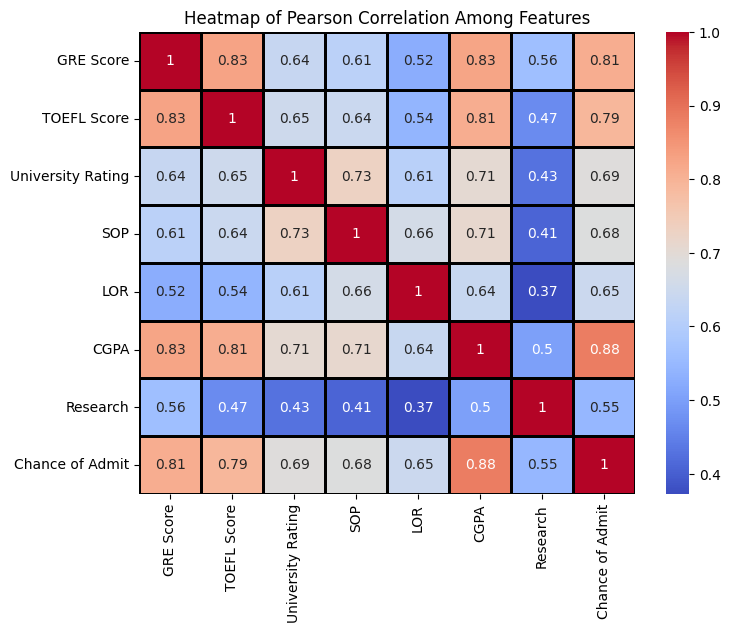

In [ ]:
# Plotting Heatmap of Pearson Correlation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# TODO: Fill in the appropriate variable to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2, linecolor='black')
plt.title('Heatmap of Pearson Correlation Among Features')
plt.show()

**Comments:**

**Bivariate Analysis:**
* GRE Score and TOEFL Score seem to be weakly linearly correlated with each other
* GRE Score and CGPA seem to be weakly linearly correlated with each other
* GRE Score and Chance of Admit seem to be linearly correlated with each other


* There is higher GRE scores for applicants from universities with a higher rating
* Applicants with a stronger Statement of Purpose tend to have higher GRE scores
* Applicants with a stronger letter of Recommendation tend to have higher GRE scores
* Research students tend to have better GRE scores
* Research students tend to have higher chance of admit


**Multivariate Analysis**

From Pairplot, we can infer
* Higher Rating University Students tend to have higher GRE & TOEFL scores
* Applicants with stronger LOR & SOP tend to have higher GRE & TOEFL score
* Applicants from universities with higher rating tend to have stronger SOP and LOR
* TOEFL scores and CGPA, and TOEFL scores and Chance of Admit seem to be somewhat linearly correlated

***Therefore, Applicantas with Stronger LOR & SOP, higher GRE & TOEFL scores, high CGPA with research --> University with higher rating and High chance of admit***

From Heatmap & Correlation Matrix, we can infer
* There is linear correlation between each of the features
* None of the features are negatively correlated with each other - Whether weak or strong correlation b/w the features, there is only positive correlation b/w the features.
* Most of the correlation values is b/w 0.5 to 0.8 - i.e. there is somewhat moderate correlation b/w most of the features/
* We don't have features with >0.9 correlation, so we don't drop features at this stage

# ***2. Data Preprocessing***

1. Missing Value treatment
2. Duplicate Value Check
3. Outlier Detection

## ***Missing, Null values detection***

In [ ]:
# Null Detection
data.isna().sum(axis=0)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**As checked earlier, there are no null values for any of the columns so null Handling is not required**

## ***Duplicate values check***

In [ ]:
# To check for duplicate merits among applicants
data.duplicated().value_counts()

False    500
Name: count, dtype: int64

In [ ]:
# To check for duplicate merits among applicants
(data[:-1].duplicated()).unique()

array([False])

**Comments:**
* We don't have any duplicated merits among the applicant information available to us - So we will retain the entire data

## ***Outlier Detection***

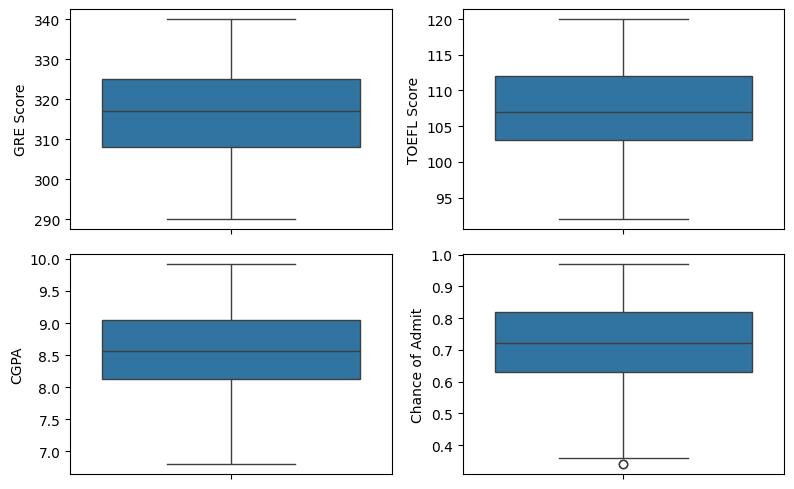

In [ ]:
# Outlier Detection
fig,ax=plt.subplots(2, 2,figsize=(8, 5))
sns.boxplot(data["GRE Score"],ax=ax[0,0])
sns.boxplot(data["TOEFL Score"],ax=ax[0,1])
sns.boxplot(data["CGPA"],ax=ax[1,0])
sns.boxplot(data["Chance of Admit"],ax=ax[1,1])
plt.tight_layout()

**Comments:**

* Since "University Rating", "SOP", "LOR", "Research" are not continuous features, we haven't created boxplots for them.
* Continuous features don't have any outliers, so outlier treatment is not required.
* Chance of Admit - There is a single outlier but since it is a probability value which is always b/w 0 & 1 we'll retain this value.
* For "University Rating", "SOP", "LOR", "Research" - the ordinality is important we are not changing them to a categorical
* No outlier treatment required for our data set


# ***2.1. Data Preparation for Modelling***

## ***Encoding***

**Plan:**

"Research" column is already encoded to 0 or 1
* Ordinality that 1>0 is also of not an issue here since research students have higher chance of admit, so ideally target variable encoding is not required here
* But if we do target variable encoding we will also be able to supply mean chance of admit for each of the values 1 and 0 which will provide more information to the model
* So we will do Target Variable encoding for this feature


"University Rating", "SOP", "LOR" are discrete numerical features, so they are already label encoded
* They have an ordinality associated with each one of them which is actually meaningful for the model as these have around ~.7 pearson rho with target
* Which means they are positively correlated with the target variable i.e. if "University Rating", or "SOP", or "LOR" increases "Chance of Admit" also increases
* Since that ordinality is important we don't need to replace these with Target Variable Encoding


To Summarize
* We don't need to do Target Variable encoding for "University Rating", "SOP", "LOR"
* But to supply more information to the model we will do it just for "Research"

In [ ]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
# Target value encoding to Research column to bring out more information
data["Research_1"]=(data.groupby(by=["Research"])["Chance of Admit"].transform("mean"))
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Research_1
0,337,118,4,4.5,4.5,9.65,1,0.92,0.789964
1,324,107,4,4.0,4.5,8.87,1,0.76,0.789964
2,316,104,3,3.0,3.5,8.00,1,0.72,0.789964
3,322,110,3,3.5,2.5,8.67,1,0.80,0.789964
4,314,103,2,2.0,3.0,8.21,0,0.65,0.634909


## ***Train-Test Split***

In [ ]:
# Splitting the data into X & y
X = data.iloc[:,:-2]
y = data.iloc[:,-2]

In [ ]:
# Splitting onto into training and testing data as dataset is very small i.e. there are only 500 samples.
from sklearn.model_selection import train_test_split

# Splitting the data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (400, 7)
Test size: (100, 7)


## ***Standardization***

In [ ]:
# Mean Centring and Variance Scaling for the X_train, X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# Convert to DataFrame as Standardization outputs a numpy array
X_train = pd.DataFrame(X_train,columns=data.columns[:-2])
X_test = pd.DataFrame(X_test,columns=data.columns[:-2])

# ***3. Model Building***

## ***Linear Regression Using Stats Model***

**Training the model**

In [ ]:
import statsmodels.api as sm

In [ ]:
# Prepare the X & y variables to be input
# Add the constant feature corresponding to wo/b(bias) as statsmodel doesn't consider W0
X_sm_train = sm.add_constant(X_train)
y_sm_train = np.asarray(y_train)
X_sm_train.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,1.871381,1.564906,0.739578,0.063700,1.067275,1.408932,0.837931
1,1.0,0.190036,0.433259,-0.138259,-0.435910,-1.094295,0.308525,-1.193416
2,1.0,1.694398,0.756587,1.617415,1.562531,1.607668,1.901652,0.837931
3,1.0,-0.783374,-0.375060,0.739578,-0.435910,-1.094295,-1.071091,0.837931
4,1.0,0.367020,0.271595,-0.138259,-0.435910,0.526883,-0.660491,0.837931


In [ ]:
# Preparing test data to be used for statsmodel

X_sm_test=sm.add_constant(X_test)
y_sm_test=np.asarray(y_test)
X_sm_test.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,0.101544,-0.213396,-1.016096,0.563311,0.526883,-1.120363,0.837931
1,1.0,0.367020,1.079914,0.739578,0.563311,1.607668,0.850517,-1.193416
2,1.0,0.367020,0.594923,-0.138259,-0.935520,-0.553902,0.489189,0.837931
3,1.0,0.986463,1.403242,1.617415,1.062921,1.607668,0.784821,0.837931
4,1.0,-1.402817,-0.860051,-0.138259,-0.935520,-1.634687,-0.775459,0.837931


In [ ]:
# Train and fit the OLS model
model = sm.OLS(y_sm_train,X_sm_train).fit()

In [ ]:
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     277.5
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          1.36e-147
Time:                        17:31:45   Log-Likelihood:                 568.04
No. Observations:                 400   AIC:                            -1120.
Df Residuals:                     392   BIC:                            -1088.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7266      0.00

**Dropping 'SOP' and 'University Rating' features because their p value > 0.05**

* Ho: There is no linear relationship b/w independent feature and target
* Ha: There is a linear relationship b/w independent feature and target
* Assuming alpha=0.05
* Since for all the independent features except "SOP" & "University Rating" p_value < alpha, Therefore we Reject Ho, and say that there is a linear relationship b/w target and feature
* P value > 0.05 is only for "SOP" & "University Rating" columns, therefore we fail to Reject Ho, which implies no linear relationship b/w target and this feature.
* ***We will drop SOP & University Rating columns and retrain the model.***

In [ ]:
# dropping "SOP" and "univeristy Rating" feature from train and test data as p value > 0.05
X_sm_train.drop(columns=["SOP", "University Rating"],inplace=True)
X_sm_test.drop(columns=["SOP", "University Rating"],inplace=True)

In [ ]:
# Re-Train and fit the OLS model
model = sm.OLS(y_sm_train,X_sm_train).fit()

# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     387.9
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          1.02e-149
Time:                        17:31:45   Log-Likelihood:                 566.95
No. Observations:                 400   AIC:                            -1122.
Df Residuals:                     394   BIC:                            -1098.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7266      0.003    245.926      

**Comments:**
* R square and R square adjusted are almost the same even after removing 'SOP' and 'University Rating' columns as they did not have any explanatory power over the target variable.

**Testing the model**

In [ ]:
# Calculating predicted values for train and test data
y_sm_train_ = model.predict(X_sm_train)
y_sm_test_ = model.predict(X_sm_test)

**Model Evaluation**

In [ ]:
# Function for Mean_square_error
def mean_square_error(y,y_):
  return (1/len(y))*np.sum((y-y_)**2)

# Function for Root_Mean_square_error
def root_mean_square_error(y,y_):
  return np.sqrt((1/len(y))*np.sum((y-y_)**2))

# Function for Root_Mean_square_error
def mean_absolute_error(y,y_):
  return (1/len(y))*np.sum(np.absolute(y-y_))

# Function for R2_score
def R2_score(y,y_):
  return 1-((np.sum((y-y_)**2))/(np.sum((y-y.mean())**2)))

# Function for asj_R2_score
def adj_R2_score(y,y_,d):
  return 1-(((1-(R2_score(y,y_)))*(len(y)-1))/(len(y)-d-1))

In [ ]:
# Printing Evaluation Metrics

# MSE for train and test data
print(f"MSE for Training Data : {mean_square_error(y_sm_train,y_sm_train_)}")
print(f"MSE for Test Data : {mean_square_error(y_sm_test,y_sm_test_)}")

print()
print("-----------------------------------------")
print()

# RMSE for train and test data
print(f"RMSE for Training Data : {root_mean_square_error(y_sm_train,y_sm_train_)}")
print(f"RMSE for Test Data : {root_mean_square_error(y_sm_test,y_sm_test_)}")

print()
print("-----------------------------------------")
print()

# MAE for train and test data
print(f"MAE for Training Data : {mean_absolute_error(y_sm_train,y_sm_train_)}")
print(f"MAE for Test Data : {mean_absolute_error(y_sm_test,y_sm_test_)}")

print()
print("-----------------------------------------")
print()

# R2 for train and test data
print(f"R2 for Training Data : {R2_score(y_sm_train,y_sm_train_)}")
print(f"R2 for Test Data : {R2_score(y_sm_test,y_sm_test_)}")

print()
print("-----------------------------------------")
print()

# Adj R2 for train and test data

print(f"Adjusted R2 for Training Data : {adj_R2_score(y_sm_train,y_sm_train_,X_sm_train.shape[1])}")
print(f"Adjusted R2 for Test Data : {adj_R2_score(y_sm_test,y_sm_test_,X_sm_test.shape[1])}")

MSE for Training Data : 0.0034389031682364075
MSE for Test Data : 0.0041267191331368185

-----------------------------------------

RMSE for Training Data : 0.05864216203582886
RMSE for Test Data : 0.0642395449325166

-----------------------------------------

MAE for Training Data : 0.041688622125221564
MAE for Test Data : 0.04885159906248051

-----------------------------------------

R2 for Training Data : 0.8311705676583654
R2 for Test Data : 0.7637115256080494

-----------------------------------------

Adjusted R2 for Training Data : 0.8285930190729969
Adjusted R2 for Test Data : 0.748467107905343


**Comments:**

Model Summary without Assumptions being checked or followed-
* R^2 score is 0.831 and adjusted R^2 score= 0.829 for training data
* R^2 score is 0.764 and adjusted R^2 score= 0.748 for testing data
* ***This means that our model is working well and is able to perform well on unseen data - This is a good fit model***
* coef gives us the weights corresponding to each of columns & coef for const gives us the bias value

## ***Linear Regression Assumptions***

1. Linear Regression between independent variables & depedent variable.
2. Multi-collinearity
3. Mean of Residuals (should be zero)
4. Normality of Residuals
5. Heteroskedasticity


### ***1. Linear Relationship (X,y)***

#### **Pearson Correlation**

In [ ]:
# Using the correlation matrix that we created in the Correlation Matrix section we can check the pearson rho for each feature with Chance of Admit
correlation_matrix.iloc[:-1,-1]

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Name: Chance of Admit, dtype: float64

#### ***Scatter Plots***

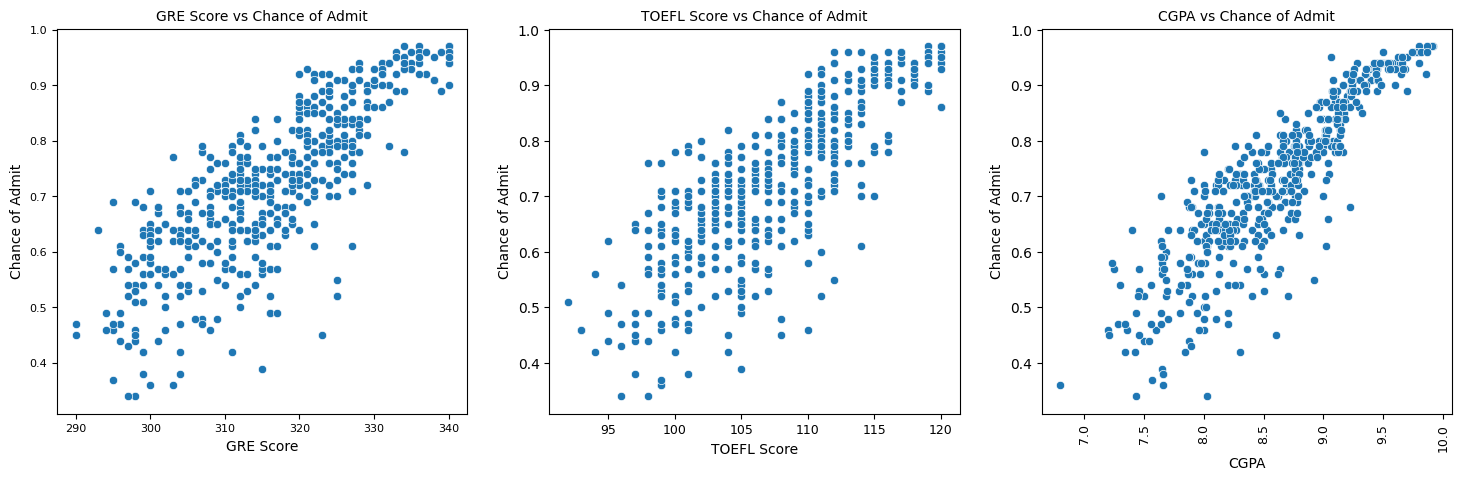

In [ ]:
# Plotting Categorical variables using Scatter Plot

plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("GRE Score vs Chance of Admit",fontsize = 10)
sns.scatterplot(data = data, x = 'GRE Score', y = 'Chance of Admit')

plt.subplot(1,3,2)
plt.xticks(fontsize = 9)
plt.title("TOEFL Score vs Chance of Admit",fontsize = 10)
sns.scatterplot(data = data, x = 'TOEFL Score', y = 'Chance of Admit')

plt.subplot(1,3,3)
plt.xticks(fontsize = 9, rotation = 90)
plt.title("CGPA vs Chance of Admit",fontsize = 10)
sns.scatterplot(data = data, x = 'CGPA', y = 'Chance of Admit')

plt.show()

**Comments:**
* From here we can that "GRE Score","TOEFL Score", "CGPA" are strongly linearly correlated with Target Variable "Chance of Admit"
* "University Rating", "SOP", "LOR" are moderately linearly correlated with "Chance of Admit"
* Research is the least correlated with "Chance of Admit"

* From Scatter plot, we can observe linear relationship between GRE Score, TOEFL Score, CGPA with Target Variable "Chance of Admit".

### ***2. Mutli-collinearity***

#### ***Variance Inflation Factor***

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_list = [np.round(variance_inflation_factor(X_train,i),2) for i in range(len(X_train.columns))]

# Creating a dataframe for VIF
vif = pd.DataFrame(zip(X_train.columns,vif_list),columns=["Feature","VIF"]).sort_values(by="VIF",ascending=False)

vif

,Feature,VIF
5,CGPA,4.83
0,GRE Score,4.52
1,TOEFL Score,3.87
3,SOP,2.79
2,University Rating,2.56
4,LOR,2.06
6,Research,1.44


**Comments:**
* Since no feature has VIF>5, we will not drop any feature from our analysis
* This shows that there is very minimal multicollinearity in our features
* Therefore most of the features are linearly independent of the rest

### ***3. Mean of Residuals***

In [ ]:
# Predicted values using stats model
y_sm_train_pred = model.predict(X_sm_train)
y_sm_test_pred = model.predict(X_sm_test)

In [ ]:
np.mean(y_sm_train - y_sm_train_pred)
# mean of residuals is almost 0 for training data

-4.421463195569686e-16

In [ ]:
np.mean(y_sm_test - y_sm_test_pred)
# mean of residuals for test data is also almost 0

0.0038223986270449232

**Comments:**
* Mean of residuals is almost 0 for both training and testing data
* This assumption holds true for our scenario

### ***4. Normality of Residuals***

#### ***QQ Plot***

In [ ]:
from statsmodels.graphics.gofplots import qqplot

In [ ]:
# Predicted values using stats model
y_sm_train_pred = model.predict(X_sm_train)
y_sm_test_pred = model.predict(X_sm_test)

In [ ]:
# Calculating train and test residuals
res_sm_train = y_sm_train - y_sm_train_pred
res_sm_test = y_sm_test - y_sm_test_pred

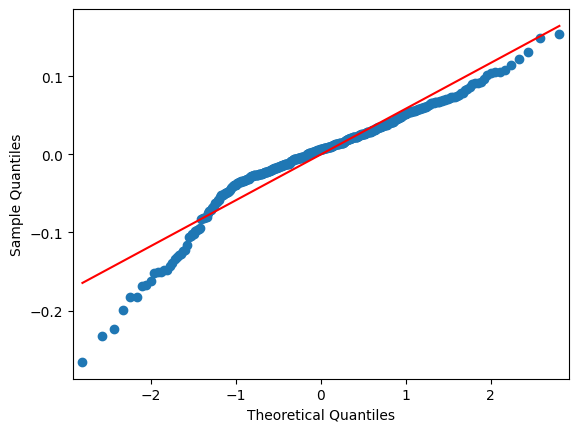

In [ ]:
#'QQ Plot of Residuals (Training data)'
qqplot(res_sm_train, line="s")
plt.show()

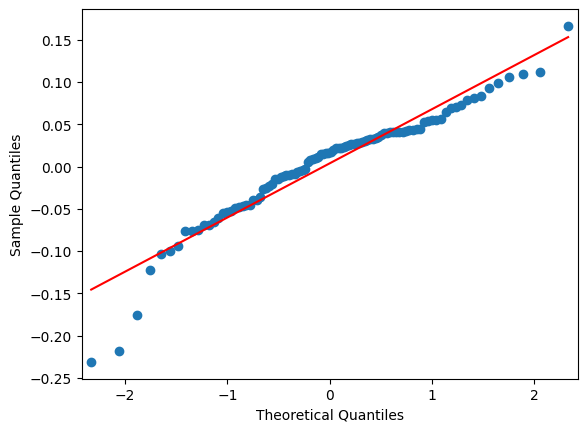

In [ ]:
# QQ Plot of Residuals (Testing data)
qqplot(res_sm_test, line="s")
plt.show()

#### ***Histogram Plot***

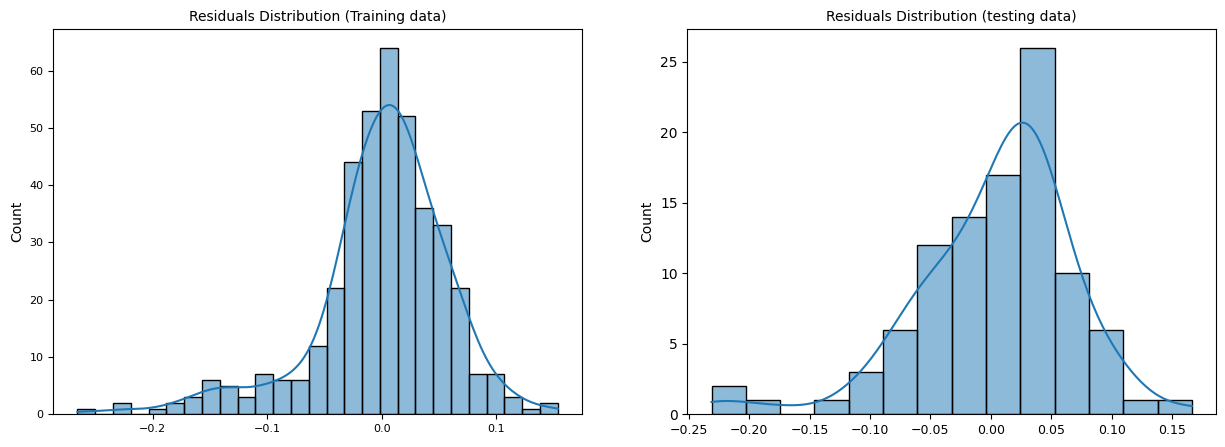

In [ ]:
# Plotting Histogram for train and test data
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Residuals Distribution (Training data)",fontsize = 10)
sns.histplot(res_sm_train, kde = True)

plt.subplot(1,2,2)
plt.xticks(fontsize = 9)
plt.title("Residuals Distribution (testing data)",fontsize = 10)
sns.histplot(res_sm_test, kde = True)

plt.show()

**Comments:**
* Residuals (training & testing data) - Have all observations under 3 SD Std deviation but more than expected number of obs above 2 SD have - ***There is more left skewness and little right skewness in the data.***
* Histogram for Residuals (training & testing data) - ***Are somewhat normally distributed but have left skewness as observed in QQ Plot.***

***Therefore, assumption of Normality of Residuals partially holds true***


### ***5. Heteroskedasticity***

#### ***Scatter Plot***

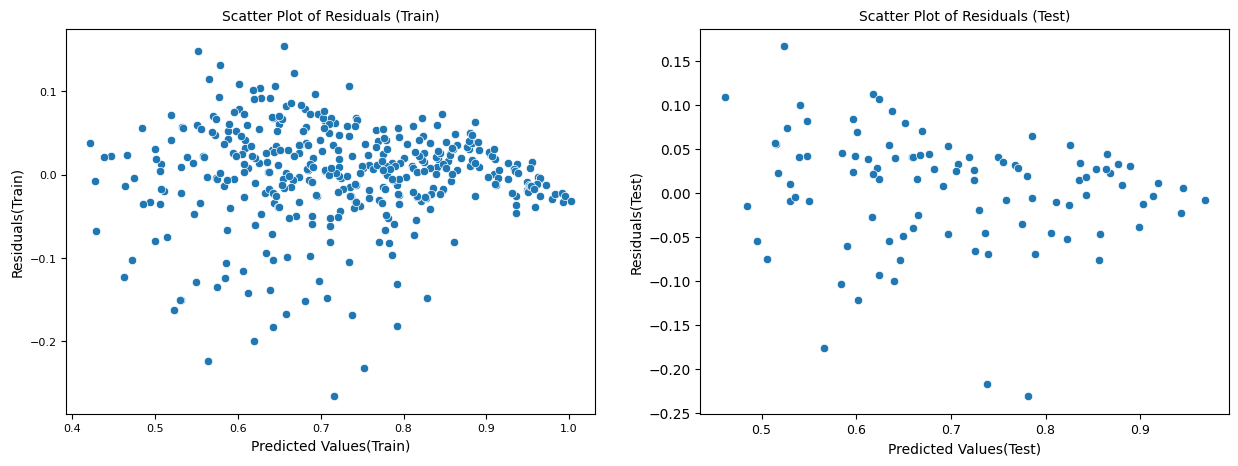

In [ ]:
# Plotting Scatter plot for train and test data
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Scatter Plot of Residuals (Train)",fontsize = 10)
sns.scatterplot(x=y_sm_train_pred ,y=res_sm_train)
plt.xlabel("Predicted Values(Train)")
plt.ylabel("Residuals(Train)")

plt.subplot(1,2,2)
plt.xticks(fontsize = 9)
plt.title("Scatter Plot of Residuals (Test)",fontsize = 10)
sns.scatterplot(x=y_sm_test_pred ,y=res_sm_test)
plt.xlabel("Predicted Values(Test)")
plt.ylabel("Residuals(Test)")

plt.show()

#### ***Goldfeld-Quandt Test***

* Null (Ho): Homoscedasticity is NOT present.
* Alternative (Ha): Heteroscedasticity is present.

In [ ]:
# Goldfeld-Quandt Test to confirm Homoskedasticity on training data
sm.stats.diagnostic.het_goldfeldquandt(y_sm_train, X_sm_train)

(0.9746571401819266, 0.5708485260551783, 'increasing')

In [ ]:
# Perform the Goldfeld-Quandt Test to confirm Homoskedasticity
sm.stats.diagnostic.het_goldfeldquandt(y_sm_test, X_sm_test)

(1.6768069876306553, 0.04500660062535386, 'increasing')

**Comments:**

Scatterplot:
* As predicted values increase, residuals starts to decrease i.e. the plot is converging for both training and testing data.

***Therefore, there might be some Heteroskedasticity in the training and testing data***

</br>

GoldFeld-Quandt Test:

**Null (H0): Homoscedasticity is present.**

**Alternative (HA): Heteroscedasticity is present.**

For training data -
* p_value = 0.57 i.e. p_value > alpha
* Fail to Reject Ho

***Therefore, there is no Heterskedasticity present in training data***

For testing data -
* p_value = 0.04 i.e. p_value < alpha
* Reject Ho

***Therefore, there is heteroskedasticity for test data but the obtained pvalue might be convulated due to few number of data points in test data hence this can be ignored.***


## ***Linear Regression Using Sci-Kit Learn***

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
print(type(X_sm_train))
print(type(y_sm_train))
print(type(X_sm_test))
print(type(y_sm_test))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
# Saving the data with irrelevant columns removed before training the model
'''
X_train = X_sm_train.copy()
X_test = X_sm_test.copy()

y_train = pd.DataFrame(y_sm_train, columns=["Chance of Admit"])
y_test = pd.DataFrame(y_sm_test, columns=["Chance of Admit"])
'''

'\nX_train = X_sm_train.copy()\nX_test = X_sm_test.copy()\n\ny_train = pd.DataFrame(y_sm_train, columns=["Chance of Admit"])\ny_test = pd.DataFrame(y_sm_test, columns=["Chance of Admit"])\n'

In [ ]:
# Fitting the linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(f"R2 score for train data: {lr.score(X_train,y_train)}")
print(f"R2 score for test data: {lr.score(X_test,y_test)}")

R2 score for train data: 0.8320945273130533
R2 score for test data: 0.7664048993199383


In [ ]:
# Predicted Values
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [ ]:
# Bias
lr.intercept_

0.72655

In [ ]:
# Coeff
# Bias
lr.coef_

array([0.024199  , 0.01713672, 0.00633025, 0.00051071, 0.01888755,
       0.07005237, 0.01187669])

**Plotting Feature Importances**

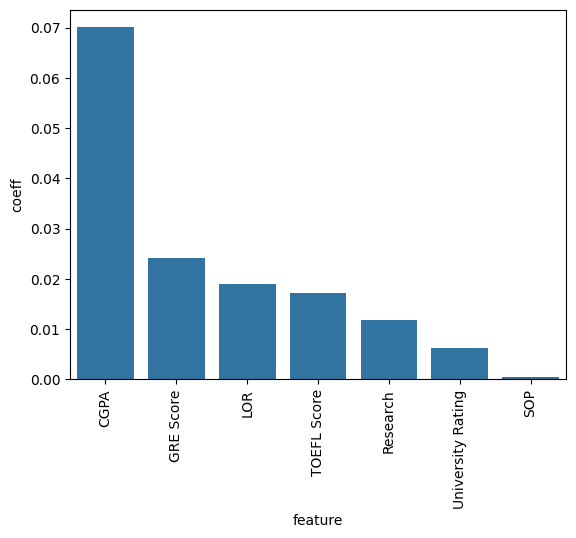

In [ ]:
# What columns / features are important based on absolute value of coefficients

import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(lr.coef_.ravel()))), columns = ['feature','coeff']).sort_values(by="coeff",ascending=False)   #.ravel( is to flatten lr.coef_ if it is not 1D)
sns.barplot(x = 'feature', y = 'coeff', data = imp)
plt.xticks(rotation = 90)
plt.show()

**Comments:**
* Feature Importance will be in the following order:
CGPA > GRE Score > LOR > TOEFL Score > Research > University Rating > SOP
* This is similar to what we were able to achieve using stats model

## ***Lasso Regression***

* Note that LassoCV() only tests alpha values 0.1, 1, and 10 by default. However, we can define our own alpha range from 0 to 1 by increments of 0.01
* **Lasso** - Is a Linear Model trained with L1 prior as regularizer (aka the Lasso).
* **LassoCV** - Is a Lasso linear model with iterative fitting along a regularization path.

**Hyper-parameter tuning**

In [ ]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
las = LassoCV(alphas=arange(0.01, 1, 0.01), cv=cv, n_jobs=-1)  # Ensure alpha value does not start from 0

#fit model
las.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(las.alpha_)

0.01


**Training with best parameters**

In [ ]:
# Training with best parameter
lasso = LassoCV(alphas = [las.alpha_], cv = cv, n_jobs = -1)
lasso.fit(X_train, y_train)

print("R2 (Train): ",lasso.score(X_train, y_train))
print("R2 (Test): ",lasso.score(X_test, y_test))

R2 (Train):  0.8240001564276089
R2 (Test):  0.7730622183871476


**Model Prediction**

In [ ]:
# Model Prediction - Testing

#predict hp value using lasso regression model
y_pred = lasso.predict(X_test)

#print mean absolute error
print(mean_squared_error(y_test, y_pred))

0.003963411621423063


**Plotting Feature Importances**

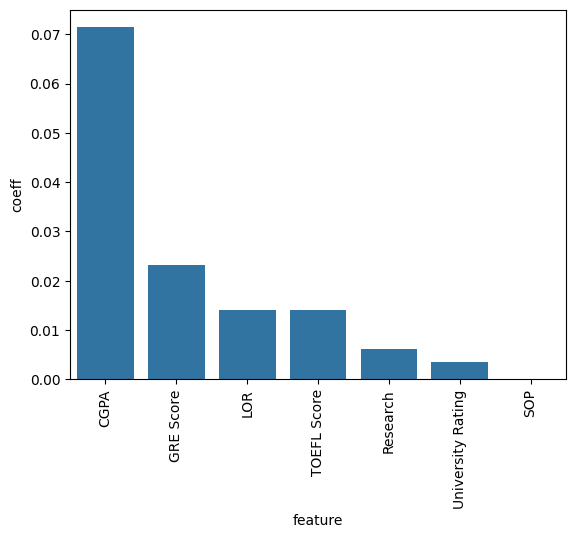

In [ ]:
# What columns / features are important based on absolute value of coefficients

import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(lasso.coef_.ravel()))), columns = ['feature','coeff']).sort_values(by="coeff",ascending=False)   #.ravel( is to flatten lr.coef_ if it is not 1D)
sns.barplot(x = 'feature', y = 'coeff', data = imp)
plt.xticks(rotation = 90)
plt.show()

## ***Ridge Regression***

* **Ridge** - Is a Linear least squares with l2 regularization.
* **RidgeCV** - Is a Ridge regression with built-in cross-validation.

**Hyper-parameter tuning**

In [ ]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


**Training with best parameters**

In [ ]:
# Training model with best parameter
ridge = RidgeCV(alphas = [model.alpha_], cv = cv, scoring='neg_mean_absolute_error')
ridge.fit(X_train, y_train)

print("R2 score (Train): ",ridge.score(X_train, y_train))
print("R2 score (Test): ",ridge.score(X_test, y_test))

R2 score (Train):  0.8320902688244043
R2 score (Test):  0.7663821790362633


**Model Prediction**

In [ ]:
# Prediction - Test data

y_pred = ridge.predict(X_test)

#print mean absolute error
print("Mean Squared Error (test data): ",mean_squared_error(y_test, y_pred))

Mean Squared Error (test data):  0.004080076838676421


**Plotting Feature Importances**

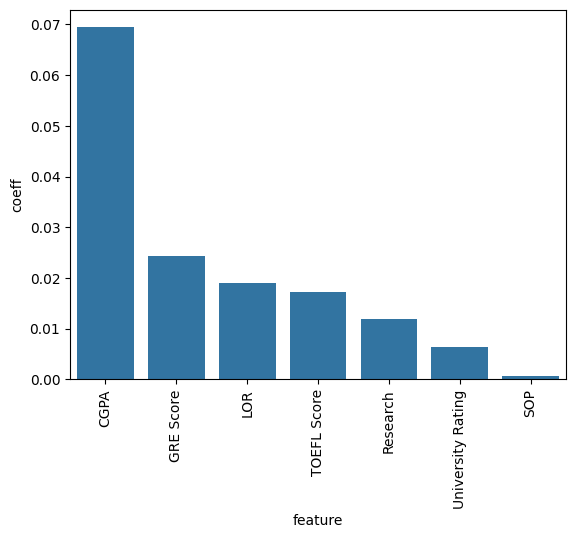

In [ ]:
# What columns / features are important based on absolute value of coefficients

import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(ridge.coef_.ravel()))), columns = ['feature','coeff']).sort_values(by="coeff",ascending=False)   #.ravel( is to flatten lr.coef_ if it is not 1D)
sns.barplot(x = 'feature', y = 'coeff', data = imp)
plt.xticks(rotation = 90)
plt.show()

**Comments:**

Feature Importances for
1. Linear Regression: CGPA > GRE Score > LOR > TOEFL Score > Researcg > University > SOP
2. Lasso Regression: CGPA > GRE Score > LOR > TOEFL Score > Researcg > University > SOP
3. Ridge Regression: CGPA > GRE Score > LOR > TOEFL Score > Researcg > University > SOP

# ***4. Model Evaluation***

## ***Model Evaluation - Linear Regression***

In [ ]:
# Printing Evaluation Metrics

# MSE for train and test data
print(f"MSE for Training Data : {mean_square_error(y_train,y_train_pred)}")
print(f"MSE for Test Data : {mean_square_error(y_test,y_test_pred)}")

print()
print("-----------------------------------------")
print()

# RMSE for train and test data
print(f"RMSE for Training Data : {root_mean_square_error(y_train,y_train_pred)}")
print(f"RMSE for Test Data : {root_mean_square_error(y_test,y_test_pred)}")

print()
print("-----------------------------------------")
print()

# MAE for train and test data
print(f"MAE for Training Data : {mean_absolute_error(y_train,y_train_pred)}")
print(f"MAE for Test Data : {mean_absolute_error(y_test,y_test_pred)}")

print()
print("-----------------------------------------")
print()

# R2 for train and test data
print(f"R2 for Training Data : {R2_score(y_train,y_train_pred)}")
print(f"R2 for Test Data : {R2_score(y_test,y_test_pred)}")

print()
print("-----------------------------------------")
print()

# Adj R2 for train and test data

print(f"Adjusted R2 for Training Data : {adj_R2_score(y_train,y_train_pred,X_train.shape[1])}")
print(f"Adjusted R2 for Test Data : {adj_R2_score(y_test,y_test_pred,X_test.shape[1])}")

MSE for Training Data : 0.0034200829439440025
MSE for Test Data : 0.004079680034602108

-----------------------------------------

RMSE for Training Data : 0.05848147522031231
RMSE for Test Data : 0.06387237301527247

-----------------------------------------

MAE for Training Data : 0.0415742435397909
MAE for Test Data : 0.04825389374865475

-----------------------------------------

R2 for Training Data : 0.8320945273130533
R2 for Test Data : 0.7664048993199383

-----------------------------------------

Adjusted R2 for Training Data : 0.8290962153007865
Adjusted R2 for Test Data : 0.7486313590508031


## ***Model Evaluation - Lasso Regression***

In [ ]:
# Printing Evaluation Metrics

y_pred = lasso.predict(X_test)

# MSE for train and test data
print(f"MSE for Test Data : {mean_square_error(y_test,y_pred)}")

print("-----------------------------------------")

# RMSE for train and test data
print(f"RMSE for Test Data : {root_mean_square_error(y_test,y_pred)}")

print("-----------------------------------------")

# R2 for train and test data
print(f"R2 for Test Data : {R2_score(y_test,y_test_pred)}")

print("-----------------------------------------")

# Adj R2 for train and test data
print(f"Adjusted R2 for Test Data : {adj_R2_score(y_test,y_test_pred,X_test.shape[1])}")

MSE for Test Data : 0.003963411621423063
-----------------------------------------
RMSE for Test Data : 0.06295563216601882
-----------------------------------------
R2 for Test Data : 0.7664048993199383
-----------------------------------------
Adjusted R2 for Test Data : 0.7486313590508031


## ***Model Evaluation - Ridge Regression***

In [ ]:
# Printing Evaluation Metrics

y_pred = ridge.predict(X_test)

# MSE for train and test data
print(f"MSE for Test Data : {mean_square_error(y_test,y_pred)}")

print("-----------------------------------------")

# RMSE for train and test data
print(f"RMSE for Test Data : {root_mean_square_error(y_test,y_pred)}")

print("-----------------------------------------")

# R2 for train and test data
print(f"R2 for Test Data : {R2_score(y_test,y_test_pred)}")

print("-----------------------------------------")

# Adj R2 for train and test data
print(f"Adjusted R2 for Test Data : {adj_R2_score(y_test,y_test_pred,X_test.shape[1])}")

MSE for Test Data : 0.004080076838676421
-----------------------------------------
RMSE for Test Data : 0.06387547916592423
-----------------------------------------
R2 for Test Data : 0.7664048993199383
-----------------------------------------
Adjusted R2 for Test Data : 0.7486313590508031


**Comments:**

**1. Linear Regression**
* Performance of Linear Regression model is the same using the Stats model and Sci-kit Learn (as expected because the assumptions all pretty must held)
* bias is 0.72, we achieved the same 0.7266 using stats model

* MSE for Training Data : 0.0034
* MSE for Test Data : 0.0041
-----------------------------------------
* RMSE for Training Data : 0.0585
* RMSE for Test Data : 0.0639
-----------------------------------------
* MAE for Training Data : 0.0416
* MAE for Test Data : 0.0483
-----------------------------------------
* R2 for Training Data : 0.832
* R2 for Test Data : 0.766
-----------------------------------------
* Adjusted R2 for Training Data : 0.829
* Adjusted R2 for Test Data : 0.749

Variables explain 83% of the variation in the target variable "Chance of Admit"

**2. Lasso Regression**

* MSE for Test Data : 0.004
-----------------------------------------
* RMSE for Test Data : 0.0629
-----------------------------------------
* R2 for Test Data : 0.766
-----------------------------------------
* Adjusted R2 for Test Data : 0.749

**3. Ridge Regression**

* MSE for Test Data : 0.004
-----------------------------------------
* RMSE for Test Data : 0.0639
-----------------------------------------
* R2 for Test Data : 0.766
-----------------------------------------
* Adjusted R2 for Test Data : 0.749

***Overall, the performance of Linear Regression (using Statsmodel & sklearn), Lasso Regression and Ridge Regression has been quite similar.***

***MSE, MAE, RMSE, R2, adj_R2 are all quite similar for all models***

# ***5. Insights and Recommendations***

## ***Insights***

* To Predict the "Chance of Admit", we see the importance of features in the following order based on Linear Regressiong(using both Statsmodel and Sklearn), Lasso Regression, & Ridge Regression -> ***CGPA > GRE Score > LOR > TOEFL Score > Research > University Rating > SOP***
*  ***CGPA, GRE Score, LOR, TOEFL Score are among the most important features to predict the "Chance of Admit"***
*   ***All the features are positively correlated with the "Chance of Admit"***, so an increased CGPA, GRE Score, LOR, TOEFL Score, University Rating will increase the chance of Admit
*   ***Research students tend to have higher "Chance of Admit"***
*  We see none of the features are negtively correlated with each other, so either moderate or high the correlation is positive, which means with an increase in one of the feature the other will also increase.
*  So,
>* Research students tend to have better GRE scores
>* Applicants with a stronger letter of Recommendation tend to have higher GRE scores
>* Applicants with a stronger Statement of Purpose tend to have higher GRE scores
>* We see higher GRE scores for applicants from universities with a higher rating
* Majority of applicants have Chance of Admit b/w 0.65 to 0.75
* We see more applicants with research background, Majority of applicants have CGPA  b/w 8.25 to 8.75
* Most of the applicants have LOR rated b/w 3-4
* Most of the applicants have SOP rated b/w 3-4
* Most of the applicants are from Universities with a rating of 3
* Majority of applicants have TOEFL scores b/w 100 to 110
* Majority of applicants have GRE scores b/w 310 to 325


**From all 3 models -**
* MSE for Test Data : 0.004
* RMSE for Test Data : 0.0639
* R2 for Test Data : 0.766
* Adjusted R2 for Test Data : 0.749
   







## ***Recommendations***

* Since CGPA is the most important feature and as CGPA increases Chance of Admit increases --> **EduCompany should try to share the importance of CGPA, in being able to receive admit to universities, among current and prospective applicants as much as possible.**
* GRE Score and TOEFL Score are also crucial features to calculate chance of Admit --> ***EduCompany should launch extensive training programs that can help applicants improve their GRE,TOEFL Scores which will in turn increase their chance of admit***
* LOR is another important factor in being able to get an admit --> **EduCompany should help their current students in being able to receive a well crafted and strong LOR which can boost their chance of Admit and advise the prospective applicants of how EduCompany can bring value in them being able to receive an admit.**
* We have seen that generally Applicants from Higher rated Universities tend to have a stronger Statement of Purpose --> **EduCompany should try and help current applicants from moderate/low rated Universities with drafting their statement of purpose in a way that makes their application strong**
* Research Students tend to have higher chances of Admit, so **EduCompany should circulate the importance of research among the applicants.**

* Additionally, **EduCompany should promote the use of this tool and incorporate other such tools in their training programs as well.**
* Based on further research on what EduCompany's competitors are using, **adoption of technology like Machine Learning will help EduCompany gain competitive advantage over its peers.**

* **Additional data can be gathered in order to be able to improve the model performance.**
* **Other Regression techniques** mentioned below can be used to achieve better results -
1) Neural Network Regression.
2) Decision Tree Regression.
3) Random Forest.
4) KNN Model.
5) Support Vector Machines (SVM)
